In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Путь к файлу с данными
dataset_path = 'https://zavarov.com/data/retention-dataset.csv'

# Чтение данных и парсинг даты
df = pd.read_csv(dataset_path, parse_dates=['date'])

# Calculation «Classic Retention»

In [87]:
def calculate_classic_retention(df: pd.DataFrame, days: list) -> list:

    # Рассчитываем начальные даты для каждого пользователя и объединяем их с исходным DataFrame
    start_date = df.groupby('user_id')['date'].min().rename('start_date')
    df = pd.merge(df, start_date, left_on='user_id', right_index=True)

    # Рассчитываем количество дней от начальной даты для каждой строки
    df['day'] = (df['date'] - df['start_date']).dt.days

    # Создаем список для хранения classic retention на каждый день
    classic_retention = []

    # Рассчитываем classic retention для каждого дня
    for day in days:
        # Выбираем пользователей, вернувшихся в день `day`
        users_with_classic_day = df[(df['day'] == day)]['user_id'].unique()

        # Рассчитываем classic retention для дня `day`
        classic_retention.append(len(users_with_classic_day) / len(df['user_id'].unique()))

    return classic_retention

In [88]:
def plt_show(days: list, retention: list, xs: list, title: str):
    plt.figure(figsize=(12, 4))
    plt.plot(days, retention)

    plt.title(title)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.gca().set(xlabel='Days', ylabel='% Retaining Users')
    plt.ylim(0, 1.05)

    for x in xs:
        plt.vlines(x=days[x], ymin=0, ymax=retention[x], linestyles='dotted')
        plt.text(x=days[x], y=retention[x] + 0.05, s='{:.0%} (day {})'.format(retention[x], x))

    plt.show()

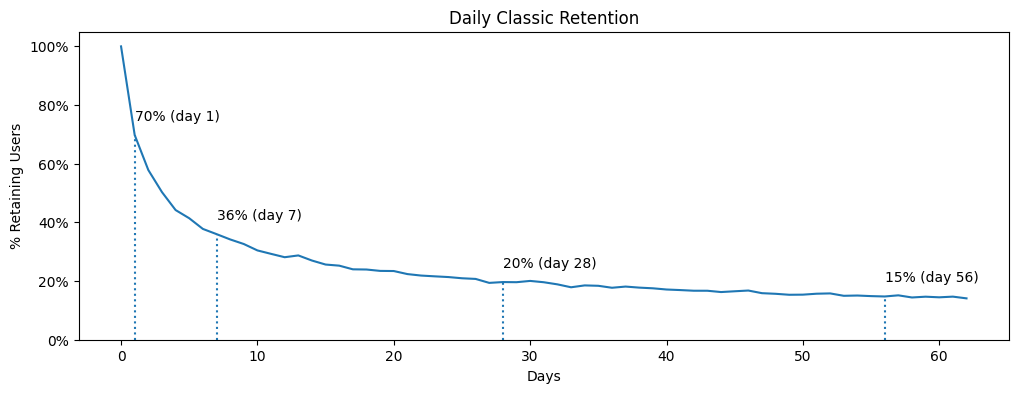

In [89]:
days = list(range(0, 63))
classic_retention = calculate_classic_retention(df, days)

plt_show(days, classic_retention, xs=[1, 7, 28, 56], title='Daily Classic Retention')

# Calculation «Rolling Retention»

In [90]:
def calculate_rolling_retention(df: pd.DataFrame, days: list) -> list:

    # Рассчитываем начальные даты для каждого пользователя и объединяем их с исходным DataFrame
    start_date = df.groupby('user_id')['date'].min().rename("start_date")
    df = pd.merge(df, start_date, left_on='user_id', right_index=True)

    # Рассчитываем количество дней от начальной даты для каждой строки
    df['day'] = (df['date'] - df['start_date']).dt.days

    # Создаем список для хранения rolling retention на каждый день
    rolling_retention = []

    # Рассчитываем rolling retention для каждого дня
    for day in days:
        # Выбираем пользователей, у которых прошло day дней от начальной даты и они остались активными
        users_with_rolling_day = df[df['day'] >= day]['user_id'].unique()

        # Рассчитываем rolling retention для данного дня
        rolling_retention.append(len(users_with_rolling_day) / len(df['user_id'].unique()))

    return rolling_retention

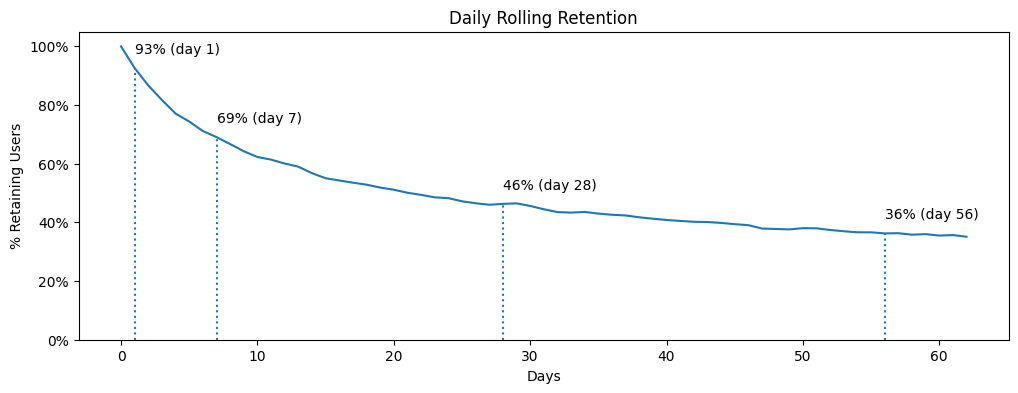

In [91]:
days = list(range(0, 63))
rolling_retention = calculate_rolling_retention(df, days)

plt_show(days, rolling_retention, xs=[1, 7, 28, 56], title='Daily Rolling Retention')

# Calculation «Full Retention»

In [94]:
def calculate_full_retention(df: pd.DataFrame, days: list) -> list:

    # Рассчитываем начальные даты для каждого пользователя и объединяем их с исходным DataFrame
    start_date = df.groupby('user_id')['date'].min().rename("start_date")
    df = pd.merge(df, start_date, left_on='user_id', right_index=True)

    # Рассчитываем количество дней от начальной даты для каждой строки
    df['day'] = (df['date'] - df['start_date']).dt.days

    # Создаем список для хранения full retention на каждый день
    full_retention = []

    for day in days:

        # Создаем множество дней, которые мы ожидаем увидеть в полном удержании
        expected_days = set(range(1, day + 1))

        # Получаем уникальные дни активности для каждого пользователя
        unique_days = df.groupby('user_id')['day'].unique()

        # Определяем пользователей с полным удержанием до retention_day
        full_retention_users = unique_days[unique_days.apply(lambda x: set(x) > expected_days)].index

        # Рассчитываем rolling retention для данного дня
        full_retention.append(len(full_retention_users) / len(df['user_id'].unique()))

    return full_retention

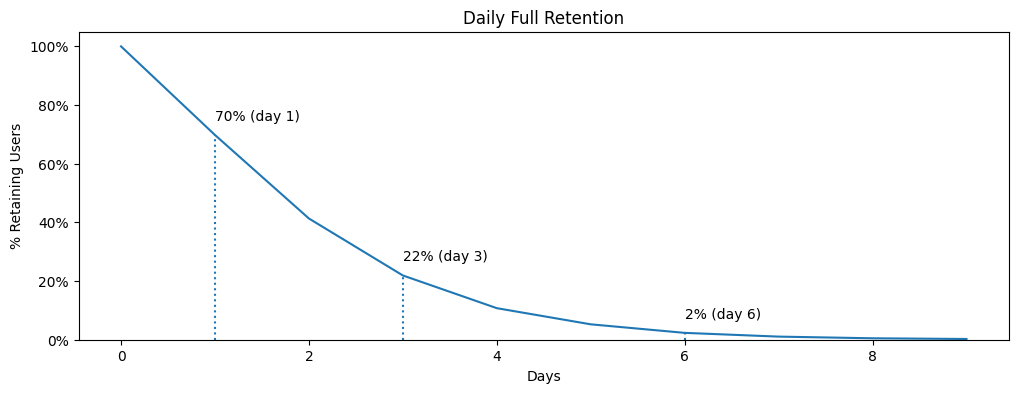

In [96]:
days = list(range(0, 10))
full_retention = calculate_full_retention(df, days)

plt_show(days, full_retention, xs=[1, 3, 6], title='Daily Full Retention')